The purpose of this notebook is to clean up the existing "final_meteorite_data" already made in order to prepare it for modeling.
The goal is to create a predictive model that allows a user to choose certain features of a meteorite and predict a geo location. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.multioutput import MultiOutputRegressor



In [3]:
df = pd.read_csv("final_meteorite_data.csv")

In [4]:
df

,Name,Year,Place,Origin,Comment,Status_simplified,Fall_simplified,Year_clean,simplified_type,Mass_g,pieces_numeric,clean_shock,clean_weath,Latitude,Longitude
0,Aachen,1880,"Nordrhein-Westfalen, Germany",NaN,NaN,accepted,Fall,1880.0,L chondrite,21.0,NaN,NaN,NaN,50.77500,6.08333
1,Aammiq,2000,"Al Biqa', Lebanon",NaN,Submitted by Edwin Gnos,accepted,Find,2000.0,H chondrite,596.0,1.0,S1,W2,33.70000,35.83333
2,Aarhus,1951,"Region Midtjylland, Denmark",NaN,NaN,accepted,Fall,1951.0,H chondrite,720.0,NaN,NaN,NaN,56.18333,10.23333
3,Aba,1927,"Kanto, Japan",NaN,NaN,rejected,Find,1927.0,Unclassified,NaN,NaN,NaN,NaN,35.95000,140.40000
4,Aba Panu,2018,"Oyo, Nigeria",NaN,Submitted by L. Garvie,accepted,Fall,2018.0,L chondrite,160000.0,50.0,S4,NaN,8.28218,3.56714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85681,Österplana 064,2011,"Skaraborgs, Sweden",NaN,NaN,uncertain,Find,2011.0,Unclassified,NaN,NaN,NaN,NaN,58.58333,13.43333
85682,Österplana 065,2011,"Skaraborgs, Sweden",NaN,NaN,uncertain,Find,2011.0,Unclassified,NaN,NaN,NaN,NaN,58.58333,13.43333
85683,Łowicz,1935,"Skierniewice, Poland",NaN,NaN,accepted,Fall,1935.0,MES,59000.0,NaN,NaN,NaN,52.00000,19.91667
85684,Święcany,2004,"Tarnow, Poland",NaN,NaN,accepted,Find,2004.0,L chondrite,8.0,1.0,S2,W3,49.79139,21.25778


In [5]:
# We will not use a few columns that are not relevant or does not contain enough data

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85686 entries, 0 to 85685
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               85686 non-null  object 
 1   Year               83758 non-null  object 
 2   Place              85686 non-null  object 
 3   Origin             22055 non-null  object 
 4   Comment            45801 non-null  object 
 5   Status_simplified  85686 non-null  object 
 6   Fall_simplified    85686 non-null  object 
 7   Year_clean         83547 non-null  float64
 8   simplified_type    85686 non-null  object 
 9   Mass_g             83866 non-null  float64
 10  pieces_numeric     49675 non-null  float64
 11  clean_shock        28155 non-null  object 
 12  clean_weath        32669 non-null  object 
 13  Latitude           52064 non-null  float64
 14  Longitude          52064 non-null  float64
dtypes: float64(5), object(10)
memory usage: 9.8+ MB


## Cleaning Data for Model 

In [7]:
df = df[["Status_simplified", "Fall_simplified", "Year_clean", "simplified_type",
         "Mass_g", "Latitude", "Longitude"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85686 entries, 0 to 85685
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Status_simplified  85686 non-null  object 
 1   Fall_simplified    85686 non-null  object 
 2   Year_clean         83547 non-null  float64
 3   simplified_type    85686 non-null  object 
 4   Mass_g             83866 non-null  float64
 5   Latitude           52064 non-null  float64
 6   Longitude          52064 non-null  float64
dtypes: float64(4), object(3)
memory usage: 4.6+ MB


In [8]:
df = df.dropna(subset=['Latitude', 'Longitude'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52064 entries, 0 to 85685
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Status_simplified  52064 non-null  object 
 1   Fall_simplified    52064 non-null  object 
 2   Year_clean         51678 non-null  float64
 3   simplified_type    52064 non-null  object 
 4   Mass_g             51064 non-null  float64
 5   Latitude           52064 non-null  float64
 6   Longitude          52064 non-null  float64
dtypes: float64(4), object(3)
memory usage: 3.2+ MB


In [9]:
df['Year_clean'] = df['Year_clean'].fillna(df['Year_clean'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52064 entries, 0 to 85685
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Status_simplified  52064 non-null  object 
 1   Fall_simplified    52064 non-null  object 
 2   Year_clean         52064 non-null  float64
 3   simplified_type    52064 non-null  object 
 4   Mass_g             51064 non-null  float64
 5   Latitude           52064 non-null  float64
 6   Longitude          52064 non-null  float64
dtypes: float64(4), object(3)
memory usage: 3.2+ MB


## Encoding + Preprocessing

In [11]:
#using onehotencoder to encode the categories. Maybe Label encoding out be better?

df_encoded = pd.get_dummies(df, columns=['Status_simplified', 'Fall_simplified', 'simplified_type'], drop_first=True)


In [12]:
df_encoded

,Year_clean,Mass_g,Latitude,Longitude,Status_simplified_rejected,Status_simplified_uncertain,Fall_simplified_Find,simplified_type_AND achondrite,simplified_type_AUB achondrite,simplified_type_Brachinite achondrite,...,simplified_type_Lunar,simplified_type_MES,simplified_type_Martian,simplified_type_Other chondrite,simplified_type_Other iron,simplified_type_PAL,simplified_type_R chondrite,simplified_type_Unclassified,simplified_type_Ureilite achondrite,simplified_type_WIN achondrite
0,1880.0,21.0,50.77500,6.08333,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2000.0,596.0,33.70000,35.83333,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1951.0,720.0,56.18333,10.23333,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1927.0,NaN,35.95000,140.40000,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2018.0,160000.0,8.28218,3.56714,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85681,2011.0,NaN,58.58333,13.43333,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
85682,2011.0,NaN,58.58333,13.43333,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
85683,1935.0,59000.0,52.00000,19.91667,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
85684,2004.0,8.0,49.79139,21.25778,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


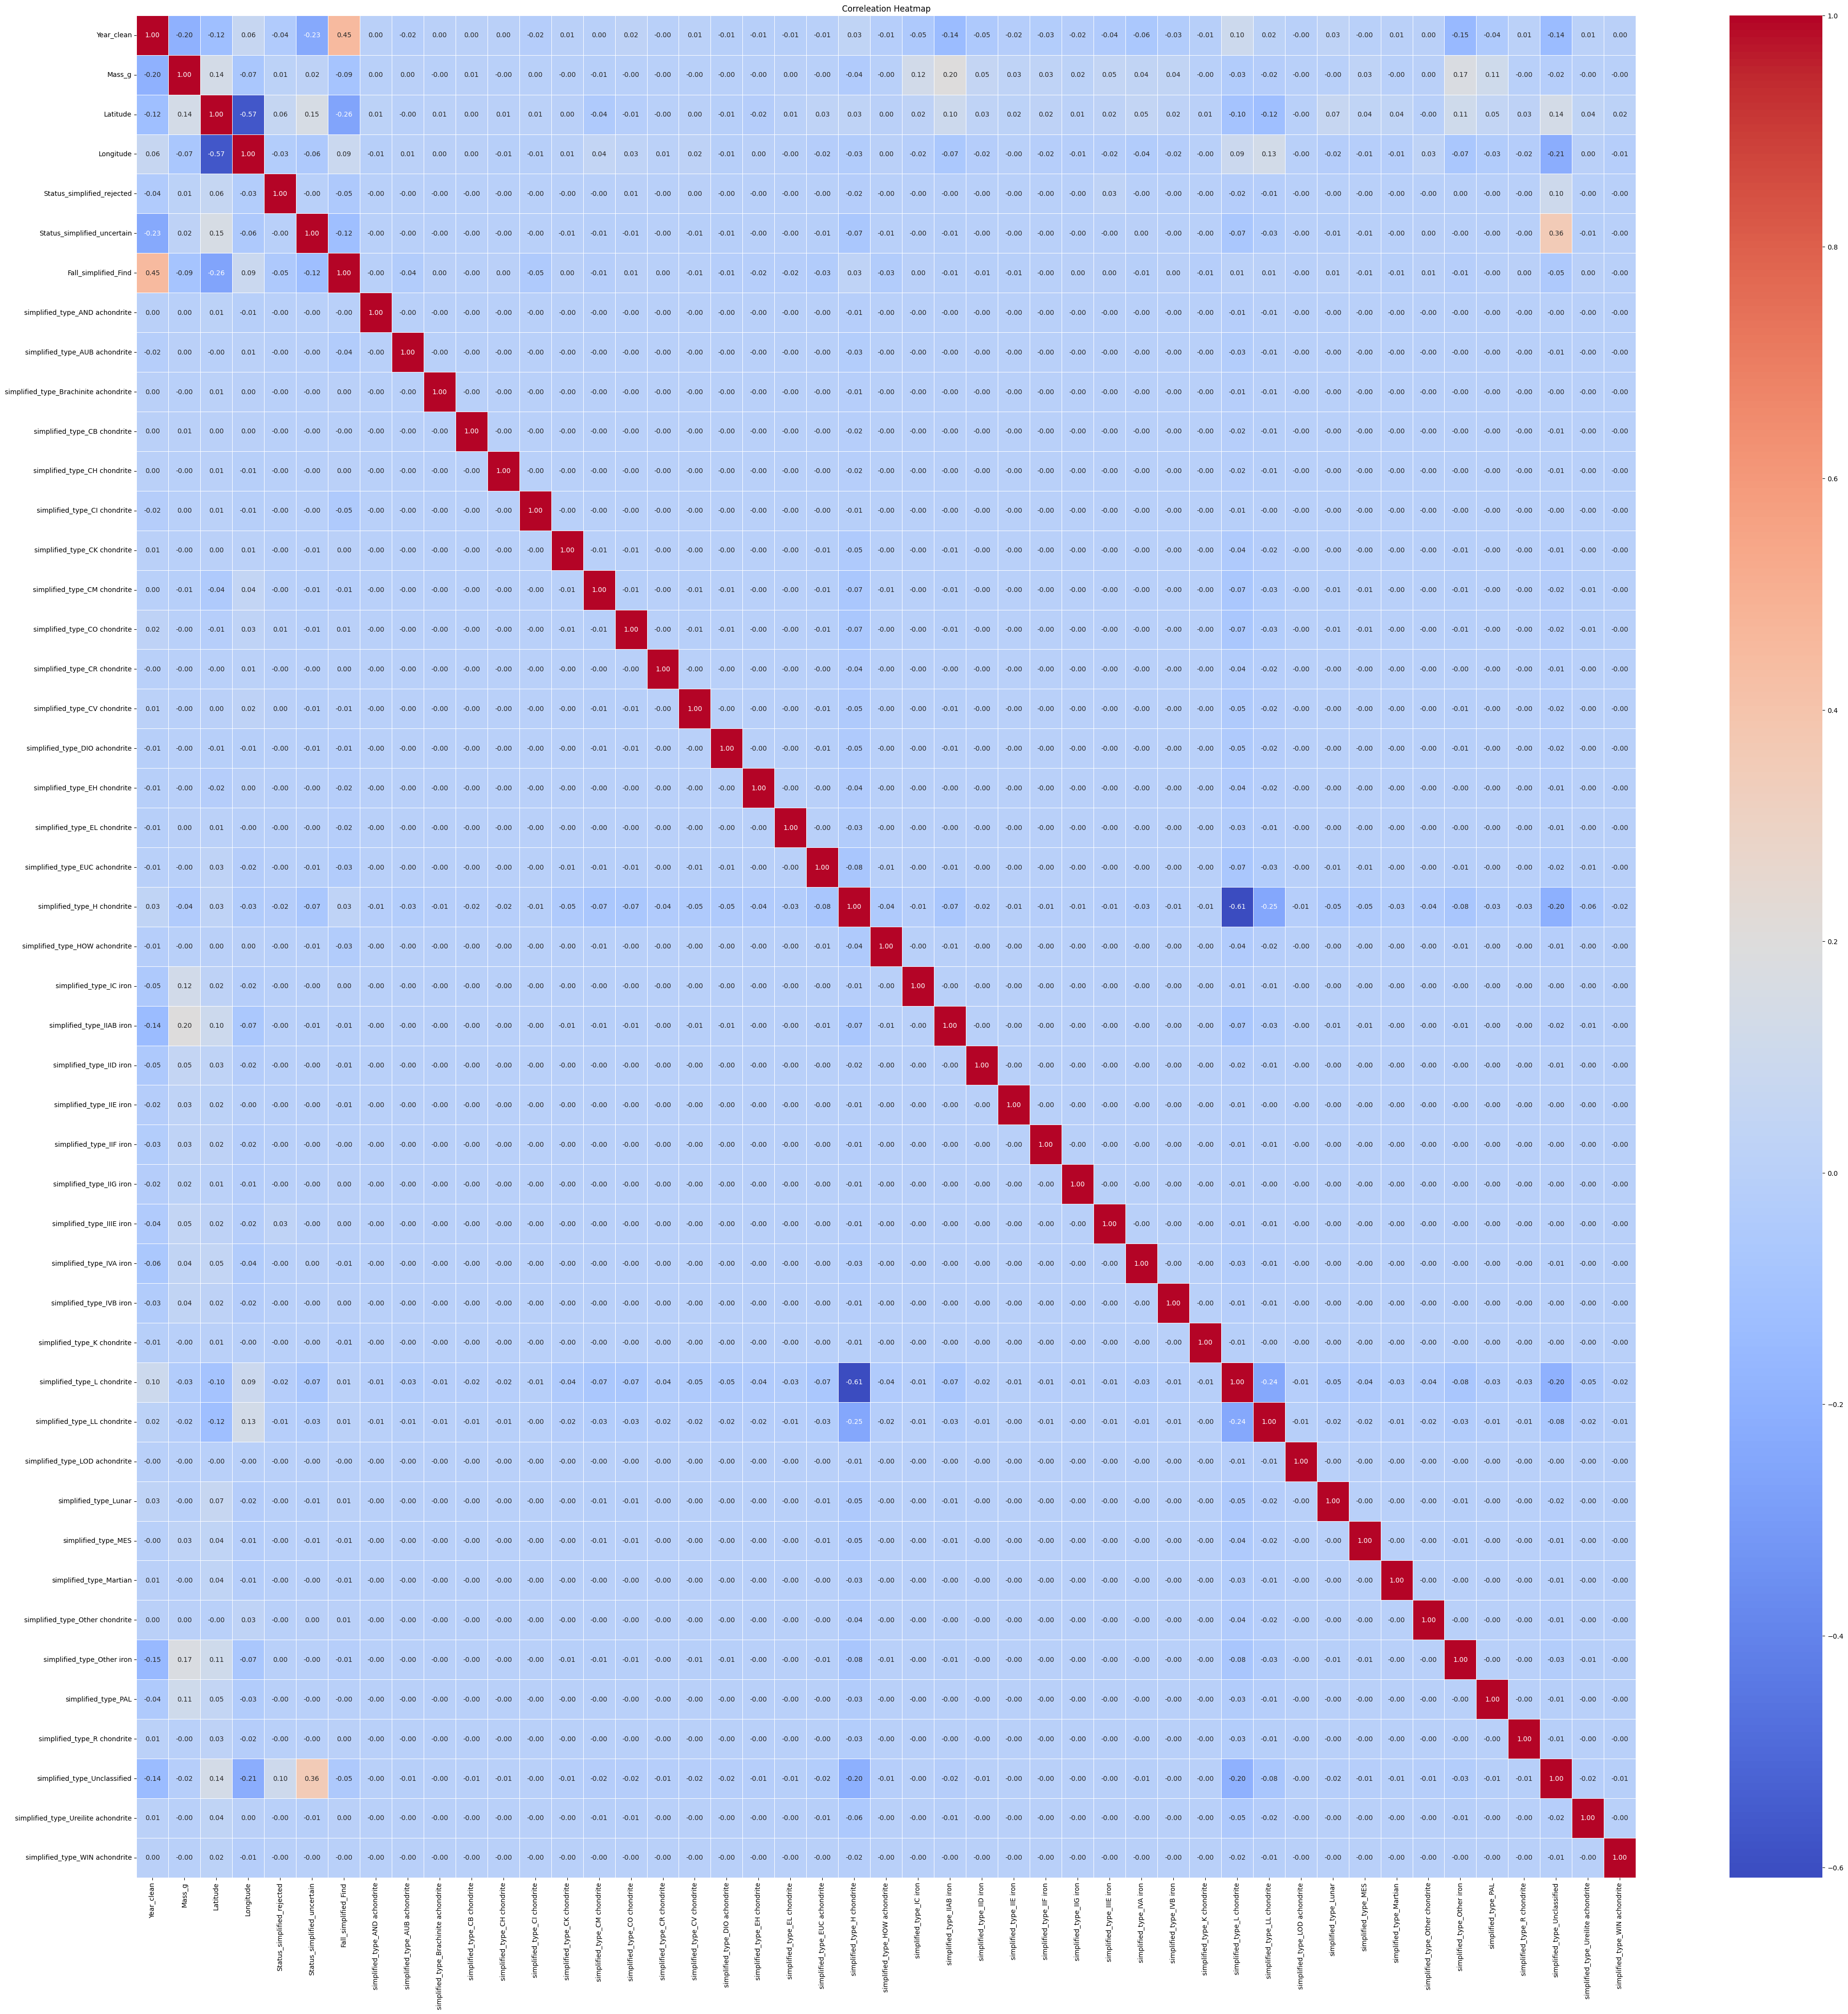

In [13]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correleation Heatmap")
plt.show()


In [14]:
corr_pairs = corr_matrix.unstack()

# Delete correlation column with itself - Values 0 and 1
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

top_10_corr = corr_pairs.abs().sort_values(ascending=False).head(10)

print(top_10_corr)

simplified_type_H chondrite   simplified_type_L chondrite     0.608857
simplified_type_L chondrite   simplified_type_H chondrite     0.608857
Longitude                     Latitude                        0.569241
Latitude                      Longitude                       0.569241
Fall_simplified_Find          Year_clean                      0.451204
Year_clean                    Fall_simplified_Find            0.451204
Status_simplified_uncertain   simplified_type_Unclassified    0.355242
simplified_type_Unclassified  Status_simplified_uncertain     0.355242
Latitude                      Fall_simplified_Find            0.261740
Fall_simplified_Find          Latitude                        0.261740
dtype: float64


In [15]:
#Long/Lat correlation with other columns descencing
lat_corr = corr_matrix["Latitude"].drop("Latitude")
lon_corr = corr_matrix["Longitude"].drop("Longitude")

combined = pd.DataFrame({
    "Latitude_corr": lat_corr,
    "Longitude_corr": lon_corr
}).sort_values(by="Latitude_corr", ascending=False)

print(combined)

                                       Latitude_corr  Longitude_corr
Status_simplified_uncertain                 0.154087       -0.055559
simplified_type_Unclassified                0.136738       -0.214753
Mass_g                                      0.136609       -0.069650
simplified_type_Other iron                  0.113844       -0.070804
simplified_type_IIAB iron                   0.096839       -0.067695
simplified_type_Lunar                       0.068350       -0.021161
Status_simplified_rejected                  0.057336       -0.028571
simplified_type_PAL                         0.050274       -0.032668
simplified_type_IVA iron                    0.049391       -0.036436
simplified_type_Martian                     0.037597       -0.012579
simplified_type_Ureilite achondrite         0.037323        0.001362
simplified_type_MES                         0.035126       -0.012405
simplified_type_IID iron                    0.029468       -0.023403
simplified_type_H chondrite       

In [16]:
# Splitting into X and y
X = df_encoded.drop(columns=['Latitude', 'Longitude'])
y = df_encoded[['Latitude', 'Longitude']]

In [17]:
# Splitting into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [19]:
# Initiate model
rfc = MultiOutputRegressor(RandomForestRegressor(n_estimators=400, random_state=42))

In [20]:
# Fit  model
rfc.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=400,
                                                     random_state=42))

In [21]:
y_pred = rfc.predict(X_test)

In [22]:
mae_lat = mean_absolute_error(y_test['Latitude'], y_pred[:, 0])
mae_lon = mean_absolute_error(y_test['Longitude'], y_pred[:, 1])

In [23]:
rmse_lat = np.sqrt(mean_squared_error(y_test['Latitude'], y_pred[:, 0]))
rmse_lon = np.sqrt(mean_squared_error(y_test['Longitude'], y_pred[:, 1]))

In [24]:
r2_lat = r2_score(y_test['Latitude'], y_pred[:, 0])
r2_lon = r2_score(y_test['Longitude'], y_pred[:, 1])

In [25]:
print("Latitude MAE:", mae_lat)
print("Longitude MAE:", mae_lon)
print("Latitude RMSE:", rmse_lat)
print("Longitude RMSE:", rmse_lon)
print("Latitude R²:", r2_lat)
print("Longitude R²:", r2_lon)
# Well that didnt work very well. Too much variance

Latitude MAE: 17.92470348773465
Longitude MAE: 37.968678045577015
Latitude RMSE: 32.127427702596336
Longitude RMSE: 65.17426330124012
Latitude R²: 0.526544731211564
Longitude R²: 0.42632521836881165


# Model #2 
## Different approach using clustering


In [27]:
# Only use rows with known Latitude and Longitude
df_reduced = df.dropna(subset=['Latitude', 'Longitude'])
df_reduced

,Status_simplified,Fall_simplified,Year_clean,simplified_type,Mass_g,Latitude,Longitude
0,accepted,Fall,1880.0,L chondrite,21.0,50.77500,6.08333
1,accepted,Find,2000.0,H chondrite,596.0,33.70000,35.83333
2,accepted,Fall,1951.0,H chondrite,720.0,56.18333,10.23333
3,rejected,Find,1927.0,Unclassified,NaN,35.95000,140.40000
4,accepted,Fall,2018.0,L chondrite,160000.0,8.28218,3.56714
...,...,...,...,...,...,...,...
85681,uncertain,Find,2011.0,Unclassified,NaN,58.58333,13.43333
85682,uncertain,Find,2011.0,Unclassified,NaN,58.58333,13.43333
85683,accepted,Fall,1935.0,MES,59000.0,52.00000,19.91667
85684,accepted,Find,2004.0,L chondrite,8.0,49.79139,21.25778


In [28]:

coords = df_reduced[['Latitude', 'Longitude']].values

sse = []  # List to store the sum of squared errors (inertia) for each K
for k in range(2, 31):  # Testing K values from 2 to 30
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coords)  # Fit to coordinate data
    sse.append(kmeans.inertia_)

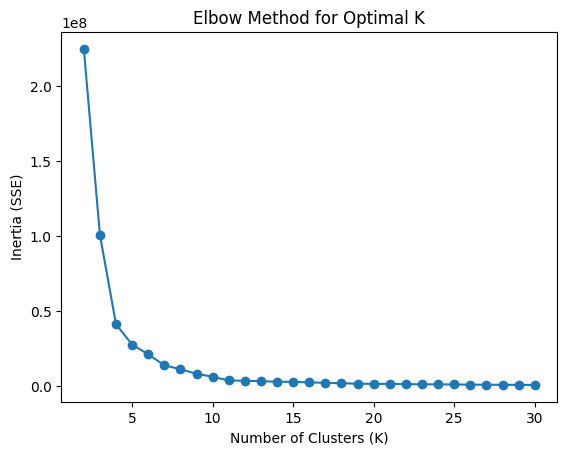

In [29]:
plt.plot(range(2, 31), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()
# looks like 8 clusters will work

In [30]:
# Define number of clusters
n_clusters = 8

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_reduced['region'] = kmeans.fit_predict(coords)

# Check cluster assignment counts
print(df_reduced['region'].value_counts())

region
2    18358
6     7884
3     6763
0     6400
1     5093
5     4124
4     3014
7      428
Name: count, dtype: int64


In [31]:
features = ['Status_simplified', 'Fall_simplified', 'Year_clean', 'simplified_type', 'Mass_g']
df_model = df_reduced[features + ['region', 'Latitude', 'Longitude']].copy()


In [32]:
# Label encode categorical columns
label_encoders = {}
for col in ['Status_simplified', 'Fall_simplified', 'simplified_type']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

In [33]:
#split 
X = df_model[features]
y = df_model['region']

#train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
# that seems much more reasonable - not super great but the best I can do

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1249
           1       0.58      0.55      0.56      1073
           2       0.78      0.79      0.78      3700
           3       0.50      0.50      0.50      1352
           4       0.55      0.60      0.58       562
           5       0.47      0.46      0.47       822
           6       0.84      0.84      0.84      1576
           7       0.34      0.33      0.33        79

    accuracy                           0.71     10413
   macro avg       0.62      0.62      0.62     10413
weighted avg       0.71      0.71      0.71     10413



In [34]:
clf_cm = confusion_matrix(y_test, y_pred)

print(clf_cm)

[[1116   24   49   32   16   11    1    0]
 [  15  586  156  176   38   76   17    9]
 [  49  138 2906  214   81  129  177    6]
 [  48  163  221  673   68  143   27    9]
 [   8   17   68   71  340   38   15    5]
 [   7   57  148  149   51  381    8   21]
 [   0   11  186   32   16   11 1319    1]
 [   0    9   15    5    6   17    1   26]]


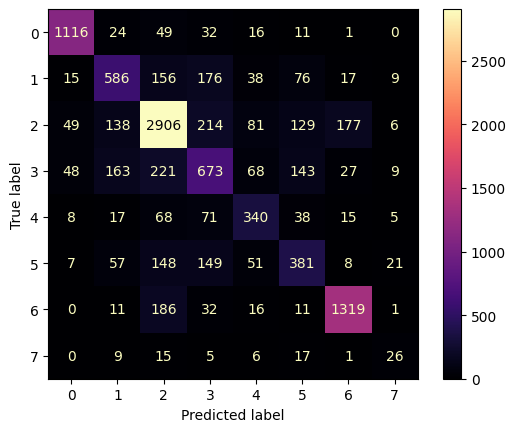

In [35]:
disp = ConfusionMatrixDisplay(clf_cm, display_labels=clf.classes_)
disp.plot(cmap="magma")
plt.show()

In [36]:
# going deeper and trying to get coordinates inside specific regions
region_regressors = {}

for region_id in df_model['region'].unique():
    df_r = df_model[df_model['region'] == region_id]
    X_r = df_r[features]
    y_r = df_r[['Latitude', 'Longitude']]
    
    reg = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))
    reg.fit(X_r, y_r)
    region_regressors[region_id] = reg

In [37]:
def predict_lat_lon(new_data_df):
    # Label encode new categorical values using the encoder we already have
    for col, le in label_encoders.items():
        df[col] = df[col].astype(str)
        known = set(le.classes_)
        df[col] = df[col].apply(lambda x: le.transform([x])[0] if x in known else -1)    
    
    
    
    #for col, le in label_encoders.items():
 #       sample[col] = le.transform(sample[col].astype(str))

    X_new = new_data_df[features]

    # Step 1: Predict region using the cld we made
    region_preds = clf.predict(X_new)

    # Step 2: Predict Lat/Lon using region-specific regressors
    preds = []
    for i, region in enumerate(region_preds):
        reg = region_regressors[region]
        x_row = X_new.iloc[[i]]
        latlon = reg.predict(x_row)[0]
        preds.append(latlon)

    return pd.DataFrame(preds, columns=["Latitude_pred", "Longitude_pred"])
# it may not be the most accurate but there could be instances where it's valuable.

In [38]:
for region_id, reg in region_regressors.items():
    df_r = df_model[df_model['region'] == region_id]
    X_r = df_r[features]
    y_r = df_r[['Latitude', 'Longitude']]
    preds = reg.predict(X_r)
    mse = mean_squared_error(y_r, preds)
    print(f"Region {region_id} MSE: {mse:.2f}")
# some of these are clearly beter than others

Region 5 MSE: 13.27
Region 3 MSE: 21.50
Region 4 MSE: 11.01
Region 1 MSE: 2.41
Region 2 MSE: 7.66
Region 6 MSE: 0.63
Region 0 MSE: 0.23
Region 7 MSE: 4.24


In [39]:
# Example input 
sample = pd.DataFrame([{
    'Status_simplified': 'accepted',
    'Fall_simplified': 'Fall',
    'Year_clean': 2000.0,
    'simplified_type': 'H chondrite',
    'Mass_g': 340.0
}])

In [40]:
for col, le in label_encoders.items():
    sample[col] = sample[col].astype(str)
    known = set(le.classes_)
    sample[col] = sample[col].apply(lambda x: le.transform([x])[0] if x in known else -1)

In [41]:
#for col, le in label_encoders.items():
#    sample[col] = le.transform(sample[col].astype(str))

In [42]:
X_sample = sample[features]

In [43]:
# Step 1: Predict region
predicted_region = clf.predict(X_sample)[0]

# Step 2: Predict precise lat/lon using that region's regressor
regressor = region_regressors[predicted_region]
lat_lon_pred = regressor.predict(X_sample)[0]

print(f"Predicted Region: {predicted_region}")
print(f"Predicted Latitude: {lat_lon_pred[0]:.5f}")
print(f"Predicted Longitude: {lat_lon_pred[1]:.5f}")

Predicted Region: 3
Predicted Latitude: 30.08578
Predicted Longitude: 121.46659


In [44]:
y_pred = clf.predict(X)
y_pred

array([5, 3, 5, ..., 5, 5, 5])

In [45]:
y_pred = reg.predict(X)
y_pred

array([[ -85.41876695,  -92.4229268 ],
       [ -85.19849525,  -93.57015548],
       [ -85.25304405,  -94.59997495],
       ...,
       [ -85.675756  , -103.1607534 ],
       [ -85.15744052,  -94.65451515],
       [ -86.36103   , -164.73691   ]])

## Export the Model


In [47]:
import pickle

In [48]:
cluster_df = df_reduced[['Latitude', 'Longitude']].copy()
cluster_df['region'] = df_reduced['region']
kmeans = KMeans(n_clusters=8, random_state=42)

In [49]:
#le_Status = LabelEncoder()
le_Status = LabelEncoder()

df_reduced['Status_simplified'] = le_Status.fit_transform(df_reduced['Status_simplified'])
df_reduced["Status_simplified"].unique()

array([0, 1, 2])

In [50]:
le_Fall = LabelEncoder()
df_reduced['Fall_simplified'] = le_Fall.fit_transform(df_reduced['Fall_simplified'])
df_reduced["Fall_simplified"].unique()

array([0, 1])

In [51]:
le_type = LabelEncoder()
df_reduced['simplified_type'] = le_type.fit_transform(df_reduced['simplified_type'])
df_reduced["simplified_type"].unique()


array([28, 16, 38, 15,  8, 40, 35, 31,  9, 29, 13,  7,  0, 10, 32, 11,  5,
       37, 39, 14, 34, 36, 19, 12, 25,  2,  6, 26, 33,  3, 17, 20,  1,  4,
       18, 24, 23, 30, 22, 21, 27])

In [52]:
# Save model, country encoder, education encoder (use a dict)

data = {"model": clf,
        "reg_model": region_regressors,
        "le_Status": le_Status,
        "le_Fall": le_Fall,
        "le_type": le_type,
        "features": features,
        "kmeans": kmeans,
        "cluster_df": cluster_df,
       }
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [53]:
# Open saved data (model + encoders) to test if prediction works

with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

clf_loaded = data["model"]
reg_model_loaded = data["reg_model"]
le_Status = data["le_Status"]
le_Fall = data["le_Fall"]
le_type = data["le_type"]
features_loaded = data["features"]
kmeans_loaded = data["kmeans"]
cluster_df = data["cluster_df"]

label_encoders = {
    'Status_simplified': le_Status,
    'Fall_simplified': le_Fall,
    'simplified_type': le_type
}

In [54]:
for col, le in label_encoders.items():
    sample[col] = sample[col].astype(str)
    known = set(le.classes_)
    sample[col] = sample[col].apply(lambda x: le.transform([x])[0] if x in known else -1)

In [55]:
X_sample = sample[features_loaded]

In [56]:
# Step 3: Predict region
predicted_region = clf_loaded.predict(X_sample)[0]

# Step 4: Use the regressor for that region
regressor = reg_model_loaded[predicted_region]
latlon_pred = regressor.predict(X_sample)[0]

# Step 5: Print result
print(f"Predicted Region: {predicted_region}")
print(f"Predicted Latitude: {latlon_pred[0]:.5f}")
print(f"Predicted Longitude: {latlon_pred[1]:.5f}")

Predicted Region: 3
Predicted Latitude: 30.12164
Predicted Longitude: 111.76901


Yes, it seems that the loaded data is close to the same.